# *---------------------Car Insurance Claim Dataset Analysis------------------*
![](http://www.rayoneindia.com/images/service-5.jpg)

# ---------------------------------------------------------------------------------------------

## Abstract:
- ### Aim or purpose of research:
The main goal here is to get rid of (very) spurious data points and perform Linear regression. With the data in hand, we start with understanding and analyzing the data. Get rid of the data that will not be useful for analysis, this is interpreted through data analysis. We perform Linear regression for the target variable of 'Car Age' and try to predict the best fit model by performing step-wise regression. We perform Logistic regression for the target variable of 'Gender' and draw the models and analyze results with the help of ROC_AUC curves, Accuracy and Cross validation error.
Also we would be observing the impact of Interaction term and would try to stablize the Linear models using L2 (Ridge) regression

# ---------------------------------------------------------------------------------------------

## Importing required libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from scipy import stats 
from sklearn import metrics 
from sklearn.metrics import mean_squared_error,mean_absolute_error, make_scorer,classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.linear_model import LinearRegression,LogisticRegression,Ridge 
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
sns.set_palette("GnBu_d")
from scipy.stats.stats import pearsonr
from statsmodels.tools.tools import add_constant


# ---------------------------------------------------------------------------------------------

### Loading the data

In [2]:
df = pd.read_excel('data/car_insurance_claim.xlsx')

#### Information about a DataFrame including the index dtype and column dtypes

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 27 columns):
ID            10302 non-null int64
KIDSDRIV      10302 non-null int64
BIRTH         10302 non-null datetime64[ns]
AGE           10295 non-null float64
HOMEKIDS      10302 non-null int64
YOJ           9754 non-null float64
INCOME        9732 non-null float64
PARENT1       10302 non-null object
HOME_VAL      9727 non-null float64
MSTATUS       10302 non-null object
GENDER        10302 non-null object
EDUCATION     10302 non-null object
OCCUPATION    9637 non-null object
TRAVTIME      10302 non-null int64
CAR_USE       10302 non-null object
BLUEBOOK      10302 non-null int64
TIF           10302 non-null int64
CAR_TYPE      10302 non-null object
RED_CAR       10302 non-null object
OLDCLAIM      10302 non-null int64
CLM_FREQ      10302 non-null int64
REVOKED       10302 non-null object
MVR_PTS       10302 non-null int64
CLM_AMT       10302 non-null int64
CAR_AGE       9663 non-null f

# ---------------------------------------------------------------------------------------------

## Exploratory data analysis

In [4]:
df.head(5)

ID  KIDSDRIV      BIRTH   AGE  HOMEKIDS   YOJ   INCOME PARENT1  \
0   63581743         0 1939-03-16  60.0         0  11.0  67349.0      No   
1  132761049         0 1956-01-21  43.0         0  11.0  91449.0      No   
2  921317019         0 1951-11-18  48.0         0  11.0  52881.0      No   
3  727598473         0 1964-03-05  35.0         1  10.0  16039.0      No   
4  450221861         0 1948-06-05  51.0         0  14.0      NaN      No   

   HOME_VAL MSTATUS         ...          CAR_TYPE RED_CAR OLDCLAIM  CLM_FREQ  \
0       0.0      No         ...           Minivan     yes     4461         2   
1  257252.0      No         ...           Minivan     yes        0         0   
2       0.0      No         ...               Van     yes        0         0   
3  124191.0     Yes         ...             z_SUV      no    38690         2   
4  306251.0     Yes         ...           Minivan     yes        0         0   

  REVOKED  MVR_PTS  CLM_AMT CAR_AGE CLAIM_FLAG           URBANICITY  
0      No        3        0    18.0          0  Highly Urban/ Urban  
1      No        0        0     1.0          0  Highly Urban/ Urban  
2      No        2        0    10.0          0  Highly Urban/ Urban  
3      No        3        0    10.0          0  Highly Urban/ Urban  
4      No        0        0     6.0          0  Highly Urban/ Urban  

[5 rows x 27 columns]

## Generating descriptive statistics central tendency,dispersion of the dataset
### Supressing scientific notation by setting display format globally

In [5]:
pd.set_option('display.float_format', '{:.2f}'.format)
df.describe().transpose()

count         mean          std      min          25%  \
ID         10302.00 495663109.08 286467479.03 63175.00 244286856.00   
KIDSDRIV   10302.00         0.17         0.51     0.00         0.00   
AGE        10295.00        44.84         8.61    16.00        39.00   
HOMEKIDS   10302.00         0.72         1.12     0.00         0.00   
YOJ         9754.00        10.47         4.11     0.00         9.00   
INCOME      9732.00     61572.07     47457.20     0.00     27584.00   
HOME_VAL    9727.00    154523.02    129188.44     0.00         0.00   
TRAVTIME   10302.00        33.42        15.87     5.00        22.00   
BLUEBOOK   10302.00     15659.92      8428.77  1500.00      9200.00   
TIF        10302.00         5.33         4.11     1.00         1.00   
OLDCLAIM   10302.00      4033.98      8733.14     0.00         0.00   
CLM_FREQ   10302.00         0.80         1.15     0.00         0.00   
MVR_PTS    10302.00         1.71         2.16     0.00         0.00   
CLM_AMT    10302.00      1511.27      4725.25     0.00         0.00   
CAR_AGE     9663.00         8.30         5.71    -3.00         1.00   
CLAIM_FLAG 10302.00         0.27         0.44     0.00         0.00   

                    50%          75%          max  
ID         497004293.00 739455069.00 999926368.00  
KIDSDRIV           0.00         0.00         4.00  
AGE               45.00        51.00        81.00  
HOMEKIDS           0.00         1.00         5.00  
YOJ               11.00        13.00        23.00  
INCOME         53529.00     86166.00    367030.00  
HOME_VAL      160661.00    238256.00    885282.00  
TRAVTIME          33.00        44.00       142.00  
BLUEBOOK       14400.00     20890.00     69740.00  
TIF                4.00         7.00        25.00  
OLDCLAIM           0.00      4647.50     57037.00  
CLM_FREQ           0.00         2.00         5.00  
MVR_PTS            1.00         3.00        13.00  
CLM_AMT            0.00      1144.75    123247.00  
CAR_AGE            8.00        12.00        28.00  
CLAIM_FLAG         0.00         1.00         1.00

### Checking for the Categorical Columns

In [6]:
df.describe(include=['O'])

PARENT1 MSTATUS GENDER      EDUCATION     OCCUPATION  CAR_USE CAR_TYPE  \
count    10302   10302  10302          10302           9637    10302    10302   
unique       2       2      2              5              8        2        6   
top         No     Yes      F  z_High School  z_Blue Collar  Private    z_SUV   
freq      8959    6188   5545           2952           2288     6513     2883   

       RED_CAR REVOKED           URBANICITY  
count    10302   10302                10302  
unique       2       2                    2  
top         no      No  Highly Urban/ Urban  
freq      7326    9041                 8230

## Cleaning dataset
### Checking for total Null values per column,if any

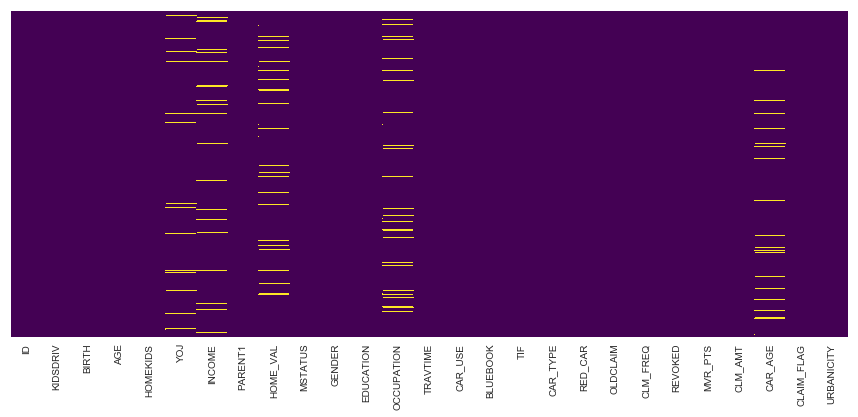

In [7]:
plt.figure(figsize=(15,6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
df['CAR_AGE'].fillna(df['CAR_AGE'].mean(),inplace = True)
df['INCOME'].fillna(df['INCOME'].mean(),inplace = True)
df['HOME_VAL'].fillna(df['HOME_VAL'].mean(),inplace = True)
df['YOJ'].fillna(df['YOJ'].mean(),inplace = True)
df['AGE'].fillna(df['AGE'].mean(),inplace = True)
df['OCCUPATION'].fillna('z_Blue Collar',inplace= True)
# Its safe to replace numeric fields with Mean, as post analysing the data keenly the Data looks normally distributed around the mean

In [9]:
df.isnull().sum().any()

False

### Converting Binary Categorical Columns into '1' and '0'

In [10]:
def convertToBin(x):
    if x in ['Yes','yes','M','Highly Urban/ Urban','Private']:
        return 0
    else:
        return 1

In [11]:
df['MSTATUS'] = df['MSTATUS'].apply(lambda x: convertToBin(x))
df['GENDER'] = df['GENDER'].apply(lambda x: convertToBin(x))
df['RED_CAR'] = df['RED_CAR'].apply(lambda x: convertToBin(x))
df['URBANICITY'] = df['URBANICITY'].apply(lambda x: convertToBin(x))
df['PARENT1'] = df['PARENT1'].apply(lambda x: convertToBin(x))
df['REVOKED'] = df['REVOKED'].apply(lambda x: convertToBin(x))
df['CAR_USE'] = df ['CAR_USE'].apply(lambda x: convertToBin(x))


In [12]:
df.head(5)

ID  KIDSDRIV      BIRTH   AGE  HOMEKIDS   YOJ   INCOME  PARENT1  \
0   63581743         0 1939-03-16 60.00         0 11.00 67349.00        1   
1  132761049         0 1956-01-21 43.00         0 11.00 91449.00        1   
2  921317019         0 1951-11-18 48.00         0 11.00 52881.00        1   
3  727598473         0 1964-03-05 35.00         1 10.00 16039.00        1   
4  450221861         0 1948-06-05 51.00         0 14.00 61572.07        1   

   HOME_VAL  MSTATUS     ...      CAR_TYPE RED_CAR OLDCLAIM  CLM_FREQ  \
0      0.00        1     ...       Minivan       0     4461         2   
1 257252.00        1     ...       Minivan       0        0         0   
2      0.00        1     ...           Van       0        0         0   
3 124191.00        0     ...         z_SUV       1    38690         2   
4 306251.00        0     ...       Minivan       0        0         0   

   REVOKED  MVR_PTS  CLM_AMT CAR_AGE  CLAIM_FLAG  URBANICITY  
0        1        3        0   18.00           0           0  
1        1        0        0    1.00           0           0  
2        1        2        0   10.00           0           0  
3        1        3        0   10.00           0           0  
4        1        0        0    6.00           0           0  

[5 rows x 27 columns]

# ---------------------------------------------------------------------------------------------

### Let's use seaborn to explore the data!
### Pair-plot for initial EDA, determining the pairwise relationships in a dataset

<Figure size 720x432 with 0 Axes>

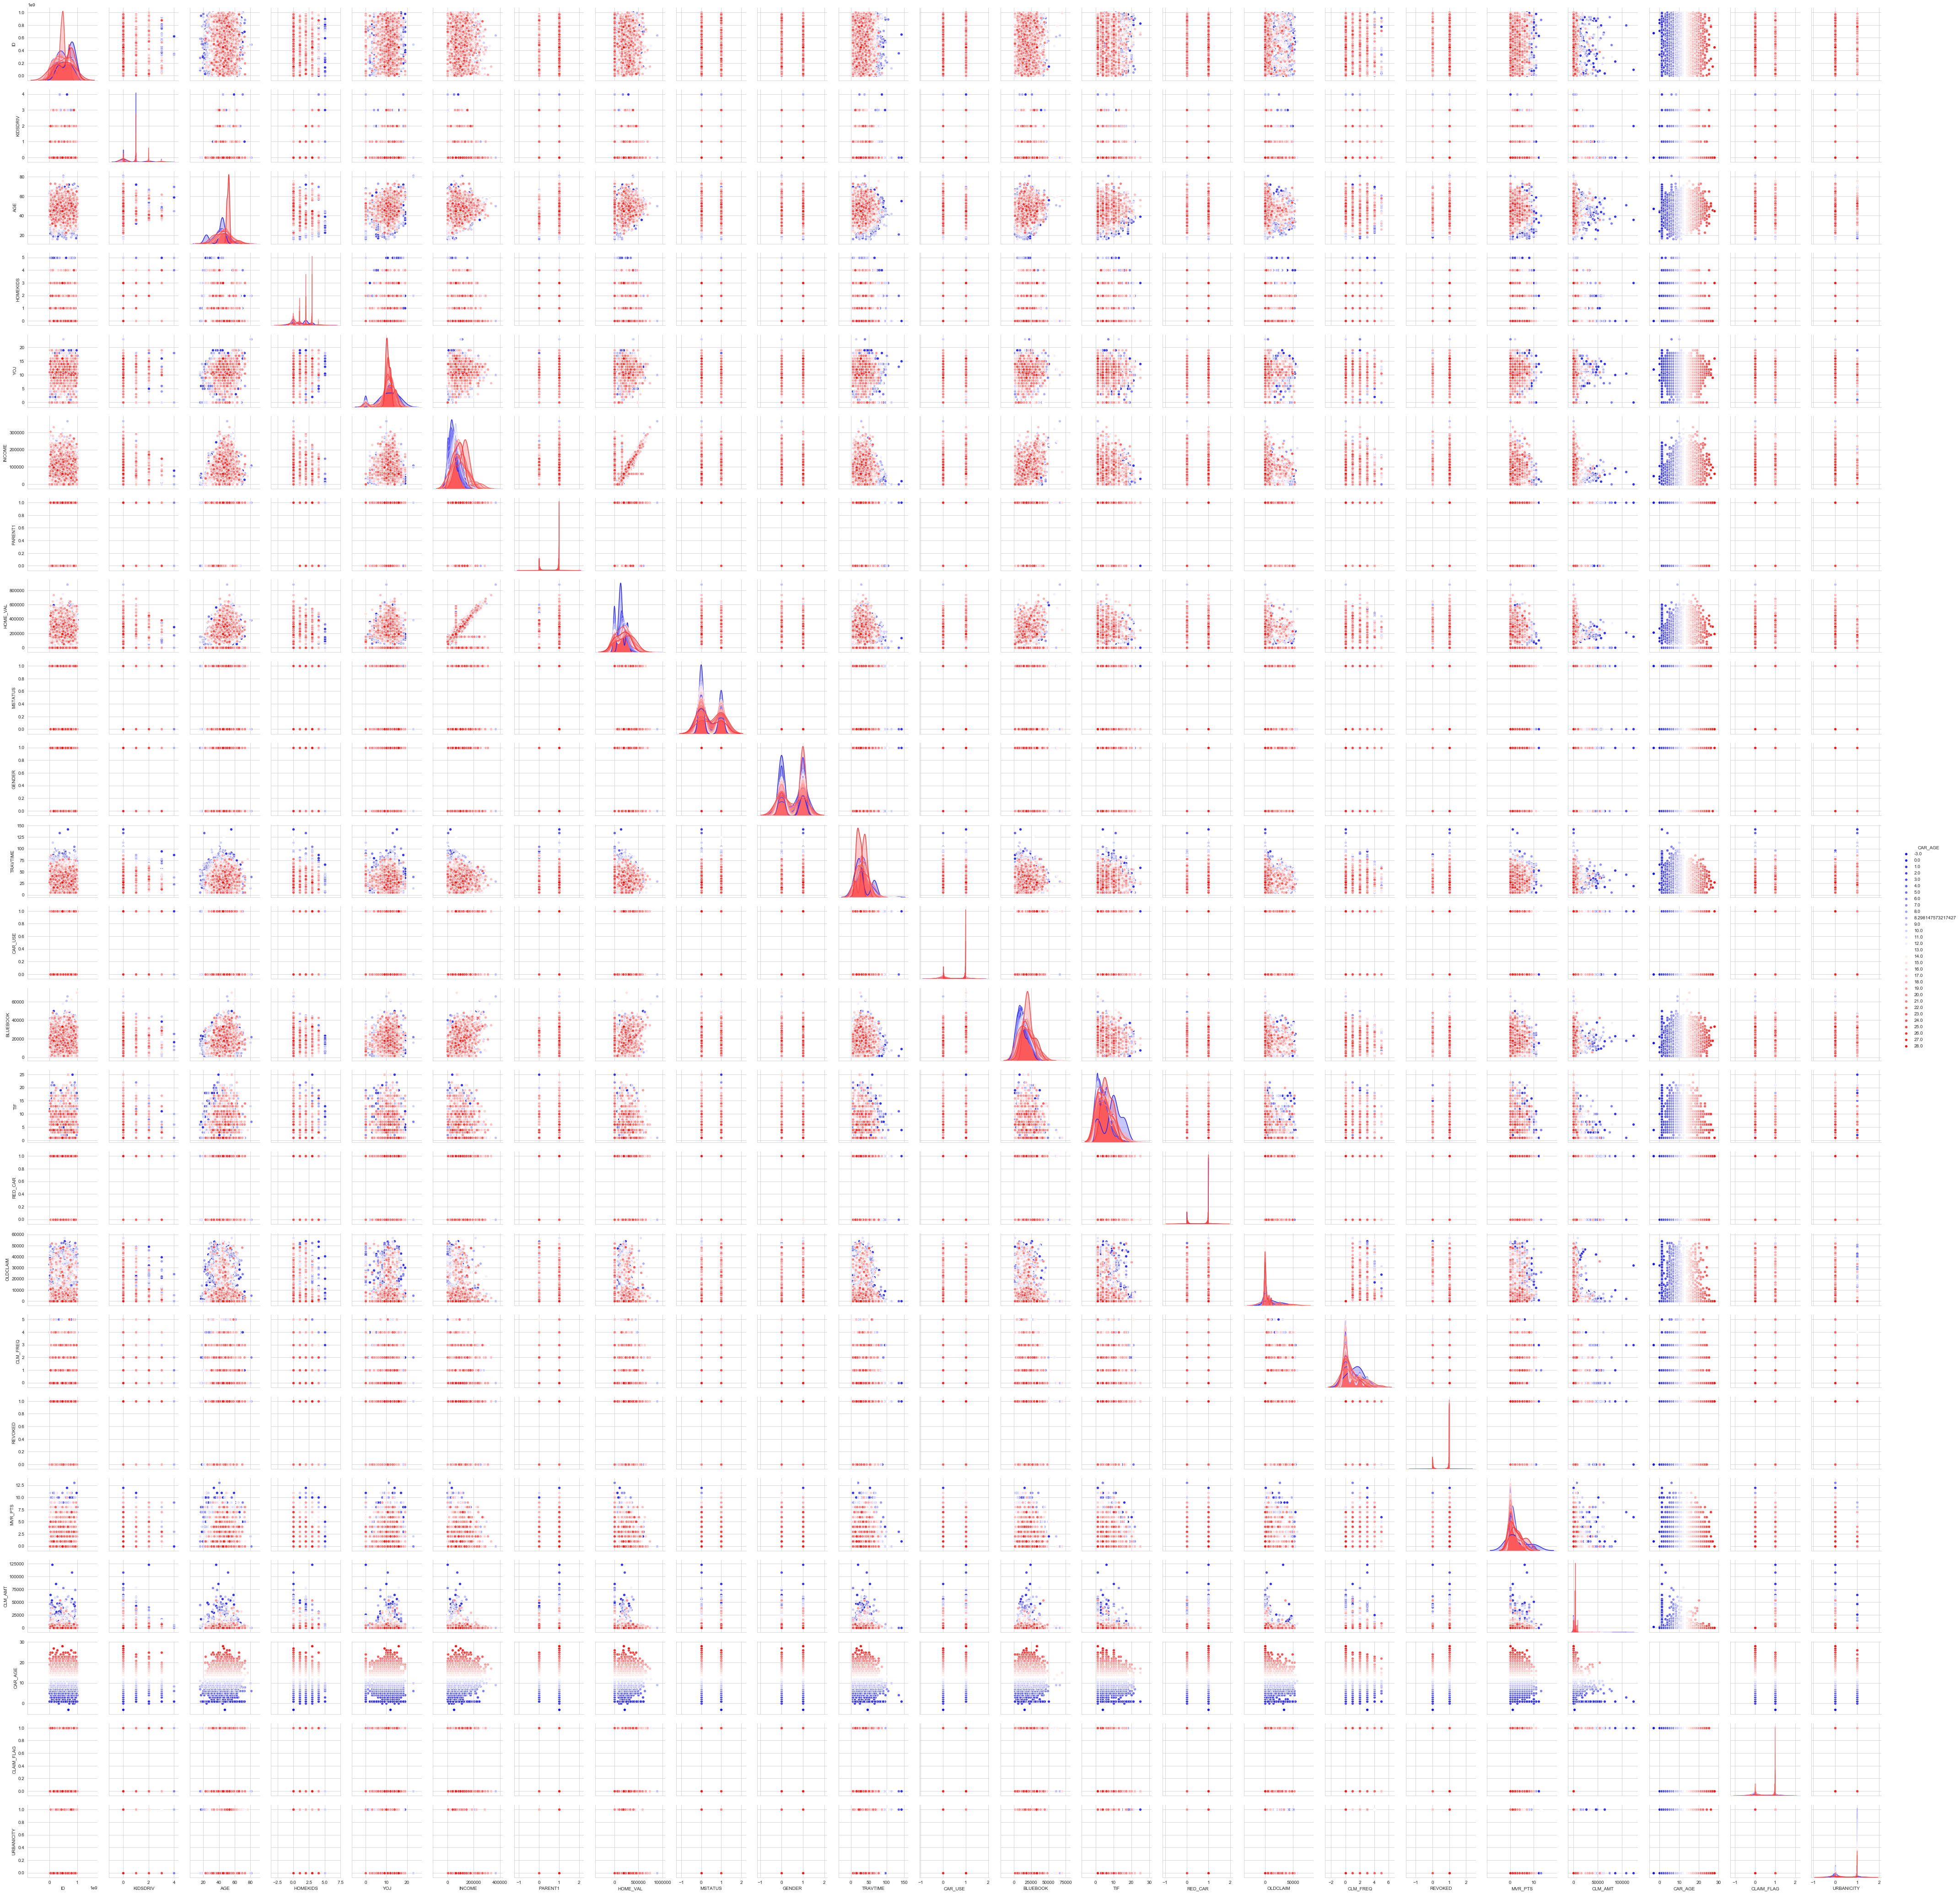

In [39]:
plt.figure(figsize=(10,6))
sns.pairplot(df,hue ='CAR_AGE',palette='bwr')

### Pairwise correlation among columns

In [13]:
df.corr()

ID  KIDSDRIV   AGE  HOMEKIDS   YOJ  INCOME  PARENT1  HOME_VAL  \
ID          1.00      0.00 -0.01      0.01 -0.01   -0.02     0.00     -0.01   
KIDSDRIV    0.00      1.00 -0.08      0.46  0.04   -0.04    -0.20     -0.02   
AGE        -0.01     -0.08  1.00     -0.45  0.14    0.18     0.31      0.20   
HOMEKIDS    0.01      0.46 -0.45      1.00  0.08   -0.16    -0.45     -0.10   
YOJ        -0.01      0.04  0.14      0.08  1.00    0.28     0.04      0.26   
INCOME     -0.02     -0.04  0.18     -0.16  0.28    1.00     0.07      0.55   
PARENT1     0.00     -0.20  0.31     -0.45  0.04    0.07     1.00      0.24   
HOME_VAL   -0.01     -0.02  0.20     -0.10  0.26    0.55     0.24      1.00   
MSTATUS     0.00     -0.04 -0.09     -0.05 -0.14    0.03    -0.47     -0.44   
GENDER     -0.01      0.04 -0.07      0.11 -0.08   -0.11    -0.07     -0.08   
TRAVTIME   -0.00      0.01 -0.00     -0.00 -0.02   -0.05     0.02     -0.03   
CAR_USE     0.02     -0.00 -0.03     -0.01  0.03    0.09    -0.00      0.03   
BLUEBOOK   -0.00     -0.03  0.17     -0.11  0.14    0.42     0.05      0.25   
TIF        -0.01     -0.01 -0.00      0.01  0.02    0.00    -0.01      0.01   
RED_CAR    -0.01      0.04 -0.03      0.07 -0.05   -0.06    -0.04     -0.03   
OLDCLAIM    0.00      0.02 -0.03      0.03 -0.00   -0.04    -0.04     -0.06   
CLM_FREQ   -0.00      0.04 -0.04      0.04 -0.02   -0.05    -0.06     -0.09   
REVOKED    -0.00     -0.03  0.05     -0.04  0.01    0.02     0.05      0.04   
MVR_PTS     0.01      0.05 -0.08      0.06 -0.04   -0.06    -0.07     -0.09   
CLM_AMT    -0.01      0.07 -0.05      0.07 -0.03   -0.06    -0.10     -0.09   
CAR_AGE    -0.00     -0.06  0.17     -0.15  0.06    0.39     0.06      0.21   
CLAIM_FLAG -0.01      0.11 -0.11      0.12 -0.06   -0.14    -0.16     -0.18   
URBANICITY  0.02      0.04 -0.04      0.06 -0.08   -0.20    -0.02     -0.11   

            MSTATUS  GENDER     ...       TIF  RED_CAR  OLDCLAIM  CLM_FREQ  \
ID             0.00   -0.01     ...     -0.01    -0.01      0.00     -0.00   
KIDSDRIV      -0.04    0.04     ...     -0.01     0.04      0.02      0.04   
AGE           -0.09   -0.07     ...     -0.00    -0.03     -0.03     -0.04   
HOMEKIDS      -0.05    0.11     ...      0.01     0.07      0.03      0.04   
YOJ           -0.14   -0.08     ...      0.02    -0.05     -0.00     -0.02   
INCOME         0.03   -0.11     ...      0.00    -0.06     -0.04     -0.05   
PARENT1       -0.47   -0.07     ...     -0.01    -0.04     -0.04     -0.06   
HOME_VAL      -0.44   -0.08     ...      0.01    -0.03     -0.06     -0.09   
MSTATUS        1.00   -0.00     ...      0.01    -0.01      0.04      0.07   
GENDER        -0.00    1.00     ...      0.01     0.66      0.00     -0.01   
TRAVTIME      -0.01    0.01     ...     -0.01    -0.00     -0.01      0.01   
CAR_USE        0.01   -0.28     ...      0.00    -0.19      0.03      0.08   
BLUEBOOK       0.01   -0.06     ...      0.00    -0.03     -0.03     -0.04   
TIF            0.01    0.01     ...      1.00     0.01     -0.02     -0.02   
RED_CAR       -0.01    0.66     ...      0.01     1.00     -0.01     -0.02   
OLDCLAIM       0.04    0.00     ...     -0.02    -0.01      1.00      0.49   
CLM_FREQ       0.07   -0.01     ...     -0.02    -0.02      0.49      1.00   
REVOKED       -0.04   -0.01     ...      0.03    -0.01     -0.42     -0.06   
MVR_PTS        0.05    0.01     ...     -0.03    -0.00      0.26      0.40   
CLM_AMT        0.08   -0.00     ...     -0.05    -0.00      0.08      0.12   
CAR_AGE        0.03   -0.02     ...      0.01    -0.02     -0.02     -0.02   
CLAIM_FLAG     0.13    0.02     ...     -0.08     0.01      0.14      0.22   
URBANICITY    -0.01    0.05     ...     -0.01     0.04     -0.15     -0.24   

            REVOKED  MVR_PTS  CLM_AMT  CAR_AGE  CLAIM_FLAG  URBANICITY  
ID            -0.00     0.01    -0.01    -0.00       -0.01        0.02  
KIDSDRIV      -0.03     0.05     0.07    -0.06        0.11        0.04  
AGE            0.05    -0

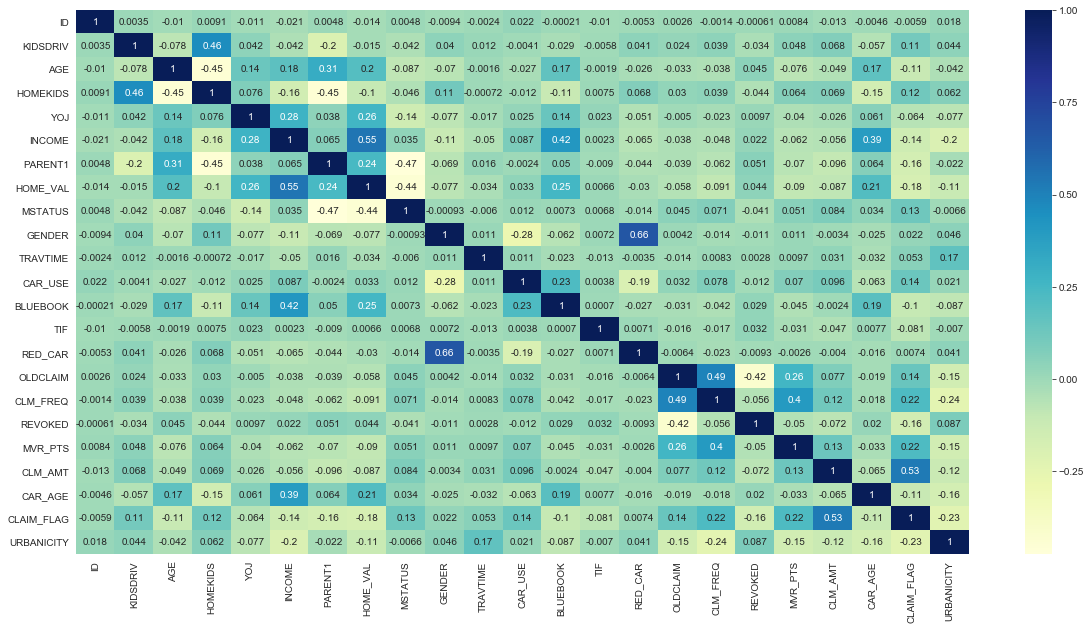

In [14]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot = True,cmap ='YlGnBu')

### Wa are going to use Car Age as the continuous variable for our Linear Models

#### Checking distribution of Car Age 

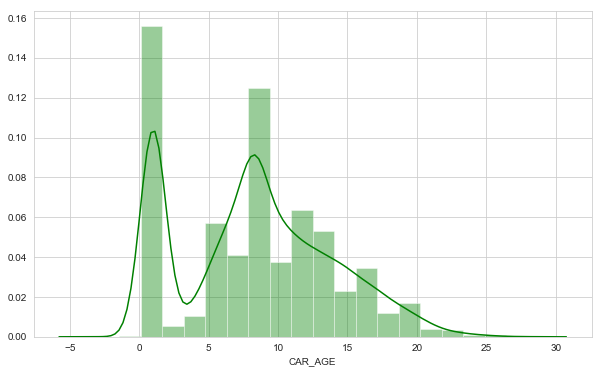

In [15]:
plt.figure(figsize=(10,6))
sns.distplot(df['CAR_AGE'],bins = 20,color='green')

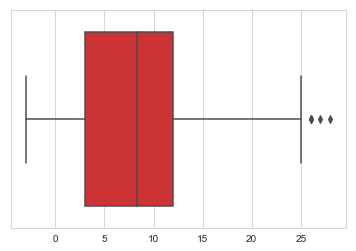

In [16]:

sns.boxplot(np.array(df['CAR_AGE']),palette='Set1')

#### Checking how scattered the distribuiton is around the linear line using LMplot

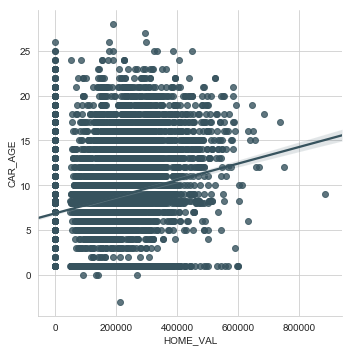

In [17]:
sns.lmplot(x='HOME_VAL',y='CAR_AGE',data=df)

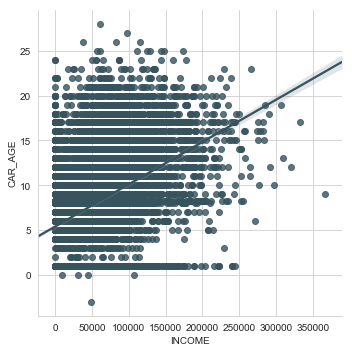

In [18]:
sns.lmplot(x='INCOME',y='CAR_AGE',data=df)

### Checking the variation of Car Age with INCOME, TRAVTIME, HOMEKIDS using seaborn JointPlot

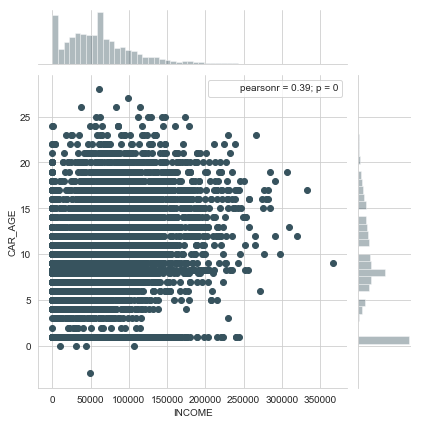

In [19]:
sns.jointplot(x='INCOME',y='CAR_AGE',kind='scatter',data=df,stat_func=pearsonr)

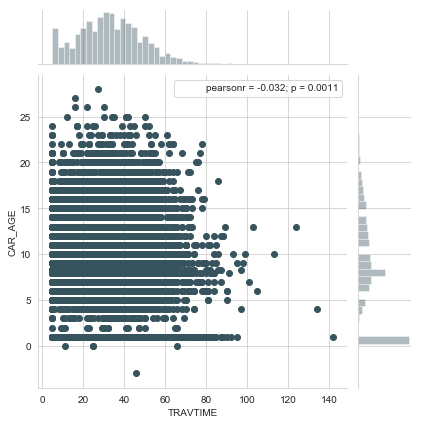

In [20]:
sns.jointplot(x='TRAVTIME',y='CAR_AGE',kind='scatter',data=df,stat_func=pearsonr)

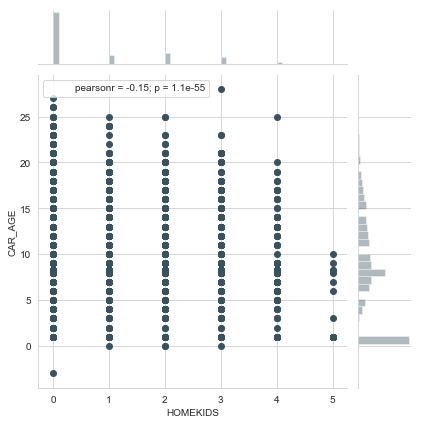

In [21]:
sns.set_palette("GnBu_d")
sns.jointplot(x='HOMEKIDS',y='CAR_AGE',kind='scatter',data=df,stat_func=pearsonr)

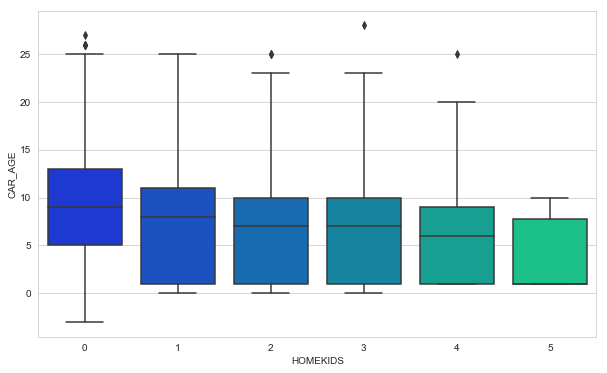

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='HOMEKIDS',y='CAR_AGE',data=df,palette='winter')

# ---------------------------------------------------------------------------------------------

### Linear Assumptions with QQ plot

No handles with labels found to put in legend.


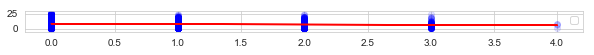

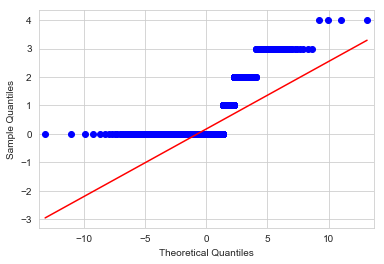

No handles with labels found to put in legend.


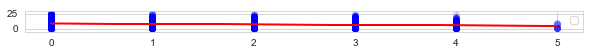

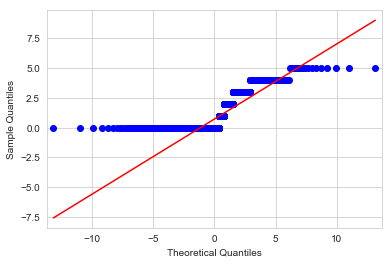

No handles with labels found to put in legend.


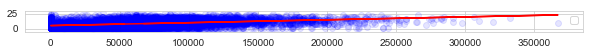

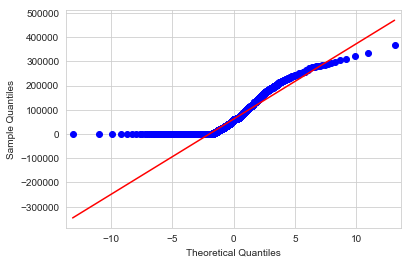

No handles with labels found to put in legend.


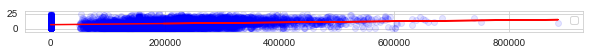

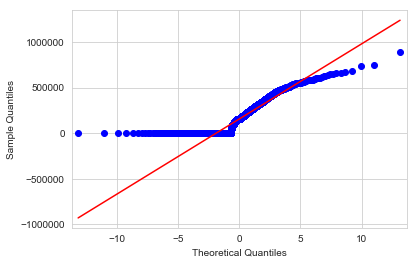

No handles with labels found to put in legend.


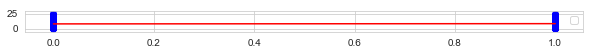

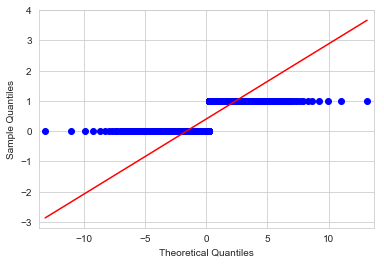

No handles with labels found to put in legend.


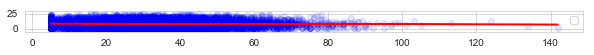

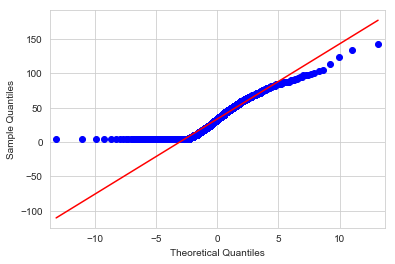

No handles with labels found to put in legend.


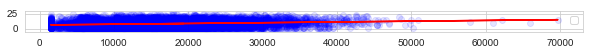

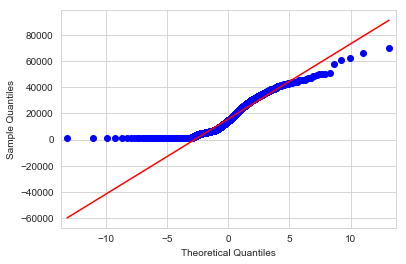

No handles with labels found to put in legend.


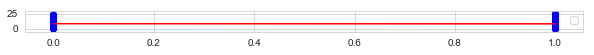

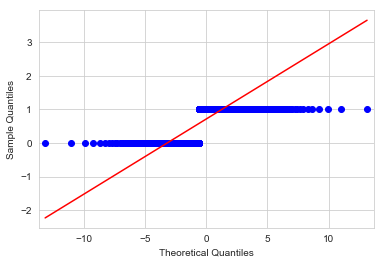

No handles with labels found to put in legend.


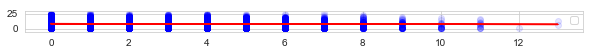

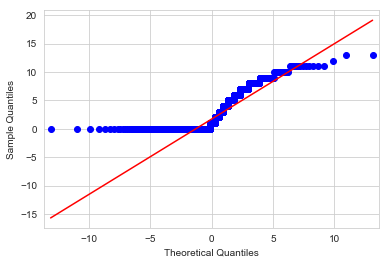

No handles with labels found to put in legend.


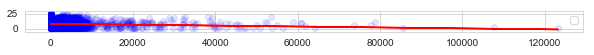

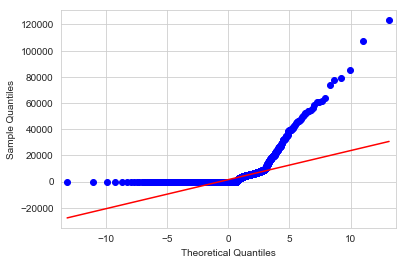

No handles with labels found to put in legend.


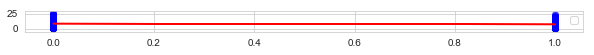

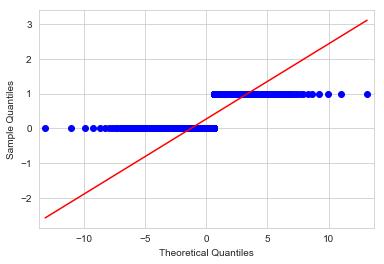

No handles with labels found to put in legend.


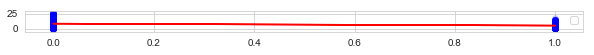

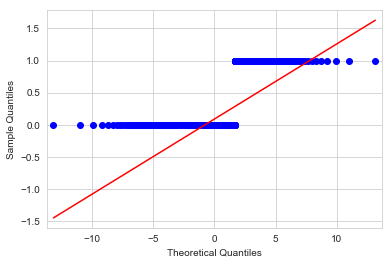

In [23]:
lm = LinearRegression()
mod_df = df.drop(['BIRTH','YOJ','GENDER','CAR_USE','TIF','OLDCLAIM','CLM_FREQ','URBANICITY','EDUCATION','AGE','PARENT1','REVOKED'],axis = 1)
cat_feats =['OCCUPATION','CAR_TYPE',]
final_data = pd.get_dummies(mod_df ,columns=cat_feats,drop_first=True)
cols = ['OCCUPATION_Doctor','OCCUPATION_Home Maker','OCCUPATION_Lawyer','OCCUPATION_Manager',
        'OCCUPATION_Professional','OCCUPATION_z_Blue Collar',
        'CAR_TYPE_Panel Truck','CAR_TYPE_Pickup','CAR_TYPE_Van','CAR_TYPE_z_SUV','CAR_TYPE_Sports Car','CAR_AGE']
X_feat = final_data.drop(cols,axis =1)
for i in range(1,13): 
    X= np.array(X_feat.iloc[:,i]).reshape(-1,1)
    y= np.array(final_data['CAR_AGE']).reshape(-1,1)
    lm.fit(X,y)
    plt.figure(figsize=(10,6))
    plt.subplot(13,1,i)
    plt.scatter(X,y,color='blue', alpha=0.1)
    plt.plot(X,lm.predict(X),color="red")
    plt.legend()
    plt.show()
    sm.qqplot(X_feat.iloc[:,i], stats.t, distargs=(4,),line = 'r')
    plt.show()

# ---------------------------------------------------------------------------------------------

## Linear Regression

### DEFINING LINEAR MODEL GENERAL FUNCTIONS

In [24]:
MODEL_ID_TEMP = []
RMSE_TEMP = []
MAE_TEMP = []
MSE_TEMP = []
CV_ERR_TEMP = []
AIC_TEMP = []
BIC_TEMP = []
R_SQUARED_TEMP = []
def calculate_cv_error(X_train,y_train):
    regr = LinearRegression()
    ms_errors= cross_val_score(regr, X_train, y_train, cv=5, scoring = make_scorer(mean_squared_error))
    rms_errors = np.sqrt(ms_errors)
    mean_rms_error = rms_errors.mean()
    return mean_rms_error

def build_OLS_model(X_train,y_train):
    ols_model = sm.OLS(y_train,X_train)
    return ols_model

def calculate_vif_(df, thresh=2.5):
    const = add_constant(df)
    cols = const.columns
    variables = np.arange(const.shape[1])
    vif_df = pd.Series([variance_inflation_factor(const.values, i) 
               for i in range(const.shape[1])], 
              index=const.columns).to_frame()

    vif_df = vif_df.sort_values(by=0, ascending=False).rename(columns={0: 'VIF'})
    vif_df = vif_df.drop('const')
    vif_df = vif_df[vif_df['VIF'] > thresh]

    print ('Features above VIF threshold:\n')
    print (vif_df[vif_df['VIF'] > thresh])

    col_to_drop = list(vif_df.index)

    for i in col_to_drop:
        print ('Dropping: {}'.format(i))
        df = df.drop(columns=i)

    return df

In [25]:
def evaluate_model(mod_df,cat_feats,i):
    final_data = pd.get_dummies(mod_df ,columns=cat_feats,drop_first=True)
    if i == 1 or  i == 2 or i ==3:
        cols = ['OCCUPATION_Doctor','OCCUPATION_Home Maker','OCCUPATION_Lawyer','OCCUPATION_Manager',
                'OCCUPATION_Professional','OCCUPATION_z_Blue Collar',
                'CAR_TYPE_Panel Truck','CAR_TYPE_Pickup','CAR_TYPE_Van','CAR_TYPE_z_SUV','CAR_TYPE_Sports Car','CAR_AGE']
        X = final_data.drop(cols,axis =1)
    else:
        X = final_data.drop('CAR_AGE',axis =1)
 
    y = final_data['CAR_AGE']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    print(f'\n\nModel {i + 1} Evaluation')
    MODEL_ID_TEMP.append('Model'+ str(i+1))
    CV_ERR = str(calculate_cv_error(X_train,y_train))
    print("Cross Validation Error: ",CV_ERR)
    model = build_OLS_model(X_train,y_train)
    results = model.fit()
    print(results.summary())
    lm = LinearRegression()
    lm.fit(X_train,y_train)
    pred = lm.predict(X_test)
    MAE = metrics.mean_absolute_error(y_test, pred)
    MSE = metrics.mean_squared_error(y_test, pred)
    RMSE= np.sqrt(metrics.mean_squared_error(y_test, pred))
    plt.scatter(y_test,pred,alpha=0.4,marker='o',cmap='red')
    plt.xlabel('Y Test')
    plt.ylabel('Predicted Y')
    plt.show()
    print("""*****************************************************
    """)
    print('MAE:', MAE)
    print('MSE:', MSE)
    print('RMSE:', RMSE)
    print("""*****************************************************
    """)
    sns.distplot((y_test-pred),bins=20,color='darkred')
    plt.show()
    CV_ERR_TEMP.append(CV_ERR)
    MSE_TEMP.append(MSE)
    MAE_TEMP.append(MAE)
    RMSE_TEMP.append(RMSE)
    AIC_TEMP.append(results.aic)
    BIC_TEMP.append(results.bic)
    R_SQUARED_TEMP.append(results.rsquared)

### Checking Multi-collinearity bwtween columns

In [26]:
mod_df = df.drop(['ID','BIRTH'],axis = 1)
cat_feats =['OCCUPATION','CAR_TYPE','EDUCATION']
final_data = pd.get_dummies(mod_df ,columns=cat_feats,drop_first=True)
calculate_vif_(final_data)

Features above VIF threshold:

                          VIF
EDUCATION_Masters        4.49
EDUCATION_PhD            3.36
GENDER                   3.32
EDUCATION_Bachelors      3.23
OCCUPATION_z_Blue Collar 2.88
INCOME                   2.72
OCCUPATION_Lawyer        2.71
CAR_TYPE_z_SUV           2.58
Dropping: EDUCATION_Masters
Dropping: EDUCATION_PhD
Dropping: GENDER
Dropping: EDUCATION_Bachelors
Dropping: OCCUPATION_z_Blue Collar
Dropping: INCOME
Dropping: OCCUPATION_Lawyer
Dropping: CAR_TYPE_z_SUV


KIDSDRIV   AGE  HOMEKIDS   YOJ  PARENT1  HOME_VAL  MSTATUS  TRAVTIME  \
0             0 60.00         0 11.00        1      0.00        1        14   
1             0 43.00         0 11.00        1 257252.00        1        22   
2             0 48.00         0 11.00        1      0.00        1        26   
3             0 35.00         1 10.00        1 124191.00        0         5   
4             0 51.00         0 14.00        1 306251.00        0        32   
5             0 50.00         0 10.47        1 243925.00        0        36   
6             0 34.00         1 12.00        0      0.00        1        46   
7             0 54.00         0 10.47        1 154523.02        0        33   
8             1 40.00         1 11.00        0      0.00        1        21   
9             0 44.00         2 12.00        0      0.00        1        30   
10            1 37.00         2 10.47        1 333680.00        0        44   
11            0 34.00         0 10.00        1      0.00        1        34   
12            0 50.00         0  7.00        1      0.00        1        48   
13            0 53.00         0 14.00        1      0.00        1        15   
14            0 43.00         0  5.00        1 209970.00        0        36   
15            0 55.00         0 11.00        1 180232.00        0        25   
16            0 53.00         0 11.00        1      0.00        1        64   
17            0 35.00         2 10.47        0      0.00        1        74   
18            0 45.00         0  0.00        1 106859.00        0        48   
19            0 39.00         3 12.00        0 180951.00        1        43   
20            0 59.00         0 12.00        1      0.00        1        45   
21            0 42.00         0 11.00        1 192207.00        0        42   
22            0 34.00         3 13.00        1  91875.00        0        27   
23            0 31.00         2 12.00        1  93797.00        0        48   
24            0 28.00         1 13.00        1 170598.00        0        29   
25            0 43.00         0 13.00        1 154523.02        0        52   
26            0 48.00         0 14.00        1 282904.00        0        36   
27            0 47.00         0 11.00        1      0.00        1        29   
28            2 44.00         2  0.00        1  82344.00        0         8   
29            0 46.00         0 14.00        1 207519.00        0         7   
...         ...   ...       ...   ...      ...       ...      ...       ...   
10272         1 46.00         0 10.00        1 236725.00        0        56   
10273         0 48.00         0 12.00        1 209239.00        0         5   
10274         0 56.00         0 11.00        1 154523.02        1        45   
10275         0 43.00         0  7.00        1 331156.00        1        27   
10276         0 41.00         0  9.00        1 334777.00        0         9   
10277         0 35.00         0  7.00        1      0.00        1        36   
10278         0 46.00         0  0.00        1      0.00        0        32   
10279         0 49.00         0 12.00        1 227054.00        1        21   
10280         0 46.00         0 12.00        1 134977.00        0        60   
10281         0 42.00         0 12.00        1 266403.00        0        24   
10282         0 36.00         2 13.00        0 352524.00        1        10   
10283         0 38.00         3  8.00        0 232182.00        1        23   
10284         0 55.00         0 10.00        1 393624.00        0        42   
10285         0 41.00         0 12.00        1 289370.00        0        24   
10286         0 60.00         0 12.00        1 153061.00        1        33   
10287         0 45.00         0 11.00        1      0.00        1        16   
10288         0 54.00         0 11.00        1 291969.00        0        38   
10289         0 54.00         0 13.00        1 244889.00        0        51   
10290         0 54.00         0 13.00        1 272725.00 

### GENERATING MULTI LINEAR REGRESSION MODELS WITH OLS SUMMARY



Model 1 Evaluation
Cross Validation Error:  3.9314550903435377
                            OLS Regression Results                            
Dep. Variable:                CAR_AGE   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     1005.
Date:                Tue, 26 Feb 2019   Prob (F-statistic):               0.00
Time:                        00:09:12   Log-Likelihood:                -19230.
No. Observations:                6902   AIC:                         3.853e+04
Df Residuals:                    6865   BIC:                         3.879e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

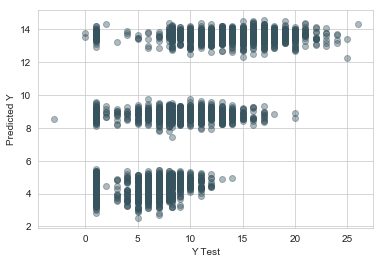

*****************************************************
    
MAE: 3.276483742205616
MSE: 15.678038057926015
RMSE: 3.9595502342975792
*****************************************************
    


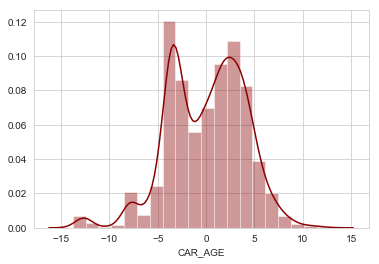



Model 2 Evaluation
Cross Validation Error:  3.925101128264033
                            OLS Regression Results                            
Dep. Variable:                CAR_AGE   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     2653.
Date:                Tue, 26 Feb 2019   Prob (F-statistic):               0.00
Time:                        00:09:13   Log-Likelihood:                -19244.
No. Observations:                6902   AIC:                         3.852e+04
Df Residuals:                    6888   BIC:                         3.861e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

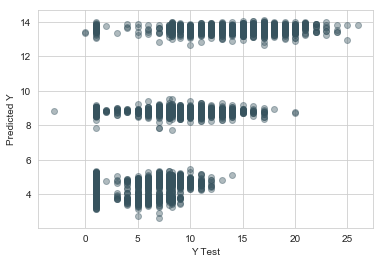

*****************************************************
    
MAE: 3.2736549003822795
MSE: 15.594098470287937
RMSE: 3.948936372023223
*****************************************************
    


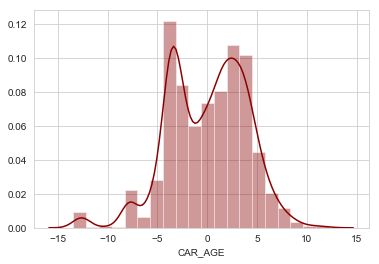



Model 3 Evaluation
Cross Validation Error:  3.926615795811311
                            OLS Regression Results                            
Dep. Variable:                CAR_AGE   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     3931.
Date:                Tue, 26 Feb 2019   Prob (F-statistic):               0.00
Time:                        00:09:13   Log-Likelihood:                -19387.
No. Observations:                6902   AIC:                         3.879e+04
Df Residuals:                    6893   BIC:                         3.885e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

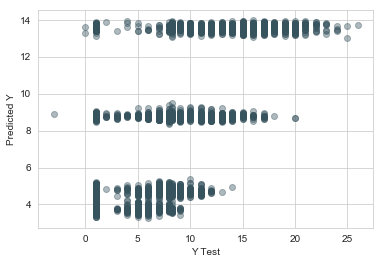

*****************************************************
    
MAE: 3.2710632634937067
MSE: 15.558285074652018
RMSE: 3.944399203256691
*****************************************************
    


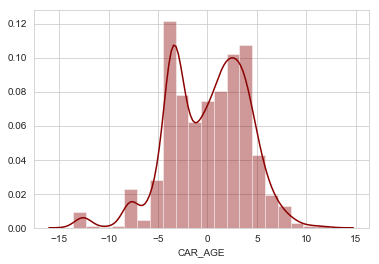

In [27]:

for i in range (3):
    if i == 0:
        mod_df = df.drop(['ID','BIRTH'],axis = 1)
        cat_feats =['OCCUPATION','CAR_TYPE','EDUCATION']
        evaluate_model(mod_df,cat_feats,i)
     
    elif i == 1:
        mod_df = df.drop(['ID','BIRTH','KIDSDRIV','YOJ','INCOME','HOME_VAL','GENDER','CAR_USE','BLUEBOOK','TIF','OLDCLAIM','CLM_FREQ','MVR_PTS','URBANICITY'],axis = 1)
        cat_feats =['OCCUPATION','CAR_TYPE','EDUCATION']
        evaluate_model(mod_df,cat_feats,i)
    else:
        mod_df = df.drop(['ID','BIRTH','KIDSDRIV','YOJ','INCOME','HOME_VAL','GENDER','CAR_USE','BLUEBOOK','TIF','OLDCLAIM','CLM_FREQ','MVR_PTS','URBANICITY','CLM_AMT','AGE','PARENT1','REVOKED','CLAIM_FLAG'],axis = 1)
        cat_feats =['OCCUPATION','CAR_TYPE','EDUCATION']
        evaluate_model(mod_df,cat_feats,i)



### Evaluation Criteria
![](https://i.stack.imgur.com/83BUy.png)

### Model Assumption Violation:
From Model 1 summary it can be observed that there is violation of linear assumption for Income column, even though it has the highest co-relation coefficient as can be seen in the heatmap. So from model 2 and further we will be dropping the Income column for our predictions

### By seeing RMSE, P value and Cross validation Error of all the three models we can conclude Model 3 to be the best model fit for Car Age prediction, even though Model 2 has a bit less CV Error but Model 3 has high AIC and BIC value with R-Squared value same as 84%

### Adding Interaction term to Model 2 and generating Model 4



Model 4 Evaluation
Cross Validation Error:  3.9260081187356874
                            OLS Regression Results                            
Dep. Variable:                CAR_AGE   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     2637.
Date:                Tue, 26 Feb 2019   Prob (F-statistic):               0.00
Time:                        00:09:17   Log-Likelihood:                -19261.
No. Observations:                6902   AIC:                         3.855e+04
Df Residuals:                    6888   BIC:                         3.865e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

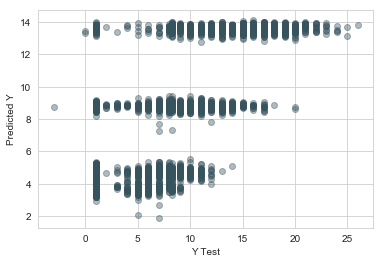

*****************************************************
    
MAE: 3.2727784641126
MSE: 15.594413484486841
RMSE: 3.948976257777051
*****************************************************
    


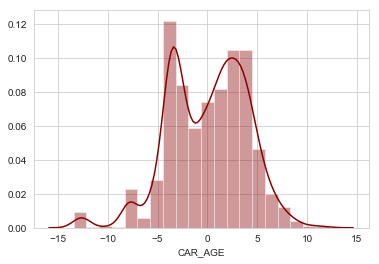

In [28]:
mod_df = df.drop(['ID','BIRTH','KIDSDRIV','YOJ','INCOME','HOME_VAL','GENDER','CAR_USE','BLUEBOOK','TIF','OLDCLAIM','CLM_FREQ','MVR_PTS','URBANICITY','CLAIM_FLAG','AGE'],axis = 1)
cat_feats =['OCCUPATION','CAR_TYPE','EDUCATION']
mod_df['HOMEKIDS * CLM_AMT'] = mod_df['HOMEKIDS'] * mod_df['CLM_AMT']
mod_df['CLM_AMT * MSTATUS'] = mod_df['CLM_AMT'] * mod_df['MSTATUS']
evaluate_model(mod_df,cat_feats,i=3)

# ---------------------------------------------------------------------------------------------

## Leaderboard for Linear Regression Models

In [29]:
leaderboard = pd.DataFrame({'Model_ID':MODEL_ID_TEMP,'RMSE':RMSE_TEMP,'MAE':MAE_TEMP,'MSE':MSE_TEMP,'CV_ERROR':CV_ERR_TEMP,'AIC':AIC_TEMP,'BIC':BIC_TEMP,'R-SQUARED':R_SQUARED_TEMP})
leaderboard

Model_ID  RMSE  MAE   MSE            CV_ERROR      AIC      BIC  R-SQUARED
0   Model1  3.96 3.28 15.68  3.9314550903435377 38534.53 38787.59       0.84
1   Model2  3.95 3.27 15.59   3.925101128264033 38515.15 38610.90       0.84
2   Model3  3.94 3.27 15.56   3.926615795811311 38791.26 38852.81       0.84
3   Model4  3.95 3.27 15.59  3.9260081187356874 38550.25 38646.00       0.84

#### Model 3 still has more AIC and BIC value among all the models even though the CV_ERROR remains approximately the same. Also Model 3 is free of any Multi Collinearity, so we could conclude MODEL 3 to be best linear model fit for our predictions

# --------------------------------------------------------------------------------------------

## Regulariztion using Ridge (L2) Regression
###  L2 regularization tries to keep all the coefficients close to zero, but nonzero, stopping any single coefficient from dominating.

In [30]:
def ridge_reg(final_data,cols,i):
    X = final_data.drop(cols,axis =1)   
    y = final_data['CAR_AGE']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    ridge = Ridge(fit_intercept=True, alpha = i)
    ridge.fit(X_train,y_train)
    y_pred = ridge.predict(X_test)
    MAE = metrics.mean_absolute_error(y_test, y_pred)
    MSE = metrics.mean_squared_error(y_test, y_pred)
    RMSE= np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    CV_ERR = ridge_cross_validation(ridge,final_data,cols)
    return (MAE,MSE,RMSE,CV_ERR)

    
def ridge_cross_validation(ridge,final_data,cols):
    X = np.array(final_data.drop(cols,axis =1))
    y = np.array(final_data['CAR_AGE'])
    kf = KFold(n_splits=5)
    kf.get_n_splits(X)
    scores = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        ridge.fit(X_train,y_train)
        scores.append(np.sqrt(metrics.mean_squared_error(y_test, ridge.predict(X_test))))
    return sum(scores)/len(scores)

#### Performing L2 regression using default value of Aplha i.e 0.5

In [31]:
mod_df = df.drop(['ID','BIRTH','KIDSDRIV','YOJ','INCOME','HOME_VAL','GENDER','CAR_USE','BLUEBOOK','TIF','OLDCLAIM','CLM_FREQ','MVR_PTS','URBANICITY','CLAIM_FLAG','AGE'],axis = 1)
cat_feats =['OCCUPATION','CAR_TYPE','EDUCATION']
mod_df['HOMEKIDS * CLM_AMT'] = mod_df['HOMEKIDS'] * mod_df['CLM_AMT']
final_data = pd.get_dummies(mod_df ,columns=cat_feats,drop_first=True)
cols = ['OCCUPATION_Doctor','OCCUPATION_Home Maker','OCCUPATION_Lawyer','OCCUPATION_Manager',
        'OCCUPATION_Professional','OCCUPATION_z_Blue Collar',
        'CAR_TYPE_Panel Truck','CAR_TYPE_Pickup','CAR_TYPE_Van','CAR_TYPE_z_SUV','CAR_TYPE_Sports Car','CAR_AGE']
MAE,MSE,RMSE,CV_ERR = ridge_reg(final_data,cols,i=0.5)
print("""*****************************************************
""")
print('MAE:', MAE)
print('MSE:', MSE)
print('RMSE:', RMSE)
print("""*****************************************************
""")
print("Cross Validation Error: ",CV_ERR)

*****************************************************

MAE: 3.2732656864118788
MSE: 15.594244151837984
RMSE: 3.9489548176495997
*****************************************************

Cross Validation Error:  3.9324306830274884


### Let's try to see the impact on RMSE and CV Error with increase in Aplha Value

*****************Ridge Regression*******************
Alpha	 RMSE_train	 RMSE_Cross_Validation
****************************************************
0.0000	 3.94888		 3.93243
1.0204	 3.94904		 3.93244
2.0408	 3.94922		 3.93247
3.0612	 3.94944		 3.93253
4.0816	 3.94969		 3.93261
5.1020	 3.94997		 3.93272
6.1224	 3.95027		 3.93284
7.1429	 3.95061		 3.93299
8.1633	 3.95097		 3.93317
9.1837	 3.95135		 3.93336
10.2041	 3.95176		 3.93357
11.2245	 3.95220		 3.93381
12.2449	 3.95265		 3.93406
13.2653	 3.95313		 3.93433
14.2857	 3.95364		 3.93462
15.3061	 3.95416		 3.93493
16.3265	 3.95470		 3.93526
17.3469	 3.95527		 3.93560
18.3673	 3.95585		 3.93596
19.3878	 3.95645		 3.93634
20.4082	 3.95708		 3.93673
21.4286	 3.95771		 3.93714
22.4490	 3.95837		 3.93756
23.4694	 3.95904		 3.93800
24.4898	 3.95973		 3.93845
25.5102	 3.96043		 3.93891
26.5306	 3.96115		 3.93939
27.5510	 3.96188		 3.93988
28.5714	 3.96263		 3.94039
29.5918	 3.96339		 3.94091
30.6122	 3.96417		 3.94144
31.6327	 3.96495		 3.94198

Text(0.5, 0, 'Alpha')

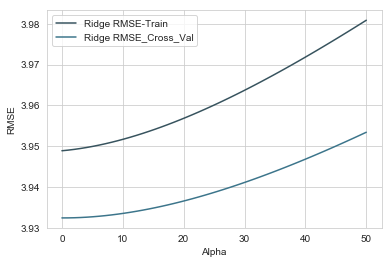

In [32]:
print('*****************Ridge Regression*******************')
print('Alpha\t RMSE_train\t RMSE_Cross_Validation')
print('****************************************************')
alpha = np.linspace(0,50,50)
t_rmse = []
cv_rmse = []

for i in alpha:
    MAE,MSE,RMSE,CV_ERR = ridge_reg(final_data,cols,i)
    t_rmse.append(RMSE)
    cv_rmse.append(CV_ERR)
    print('{:.4f}\t {:.5f}\t\t {:.5f}'.format(i,RMSE,CV_ERR))
plt.plot(alpha, t_rmse, label='RMSE-Train')
plt.plot(alpha, cv_rmse, label='RMSE_Cross_Val')
plt.legend( ('Ridge RMSE-Train', 'Ridge RMSE_Cross_Val') )
plt.ylabel('RMSE')
plt.xlabel('Alpha')


### It can be concluded from above plot, that with increase in value of Aplha there is divergence between RMSE and CV Error, and ideally it should have coberged to Zero. So the impact of L2 regularization is giving results more or less the same as of Model4.

# ---------------------------------------------------------------------------------------------

## Logistic Regression
Logistic regression measures the relationship between the categorical response variable and one or more predictor variables by estimating probabilities.
![](https://www.saedsayad.com/images/LogReg_1.png)

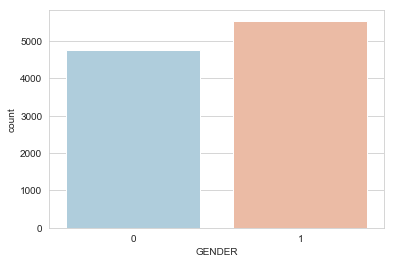

In [33]:
sns.countplot(x='GENDER',data=df,palette='RdBu_r')

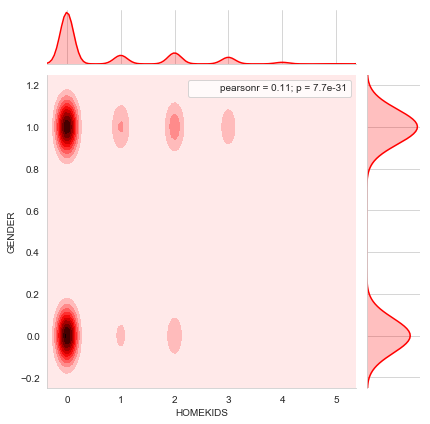

In [34]:
sns.jointplot(x='HOMEKIDS',y='GENDER',data=df,color='red',kind='kde',stat_func=pearsonr);

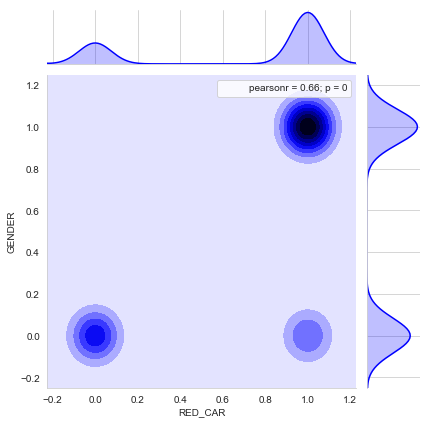

In [35]:
sns.jointplot(x='RED_CAR',y='GENDER',data=df,color='blue',kind='kde',stat_func=pearsonr);

In [36]:
MODEL_ID = []
Accuracy = []
LOG_CV_ERR = []
AIC = []
BIC = []
def evaluate_classification(mod_df,cat_feats,i):
    if i==0:
        model_name = 'Logistic_Regression_Model_1'
    elif i ==1:
        model_name = 'Logistic_Regression_Model_2'
    else:
        model_name = 'Logistic_Regression_Model_3'
    final_data = pd.get_dummies(mod_df ,columns=cat_feats,drop_first=True)
    X = final_data.drop('GENDER',axis = 1)
    y = final_data['GENDER']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    logit_model=sm.Logit(y_train,X_train.astype(float))
    result=logit_model.fit()
    print(f'{model_name}:\n{result.summary2()}')
    logmodel = LogisticRegression()
    logmodel.fit(X_train,y_train)
    predictions = logmodel.predict(X_test)
    log_cv_error = calculate_log_cv_error(logmodel,X_train,y_train)
    print(f'\nClassification Report:\n{classification_report(y_test,predictions)}')
    print('')
    print(f'\nConfusion Matrix:\n{confusion_matrix(y_test,predictions)}')
    print('')
    print (f'\nAccuracy Score:  {accuracy_score(y_test,predictions)}')
    print("Cross Validation Error: ",log_cv_error)
    logit_roc_auc = roc_auc_score(y_test, logmodel.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    Accuracy.append(accuracy_score(y_test,predictions))
    LOG_CV_ERR.append(log_cv_error)
    AIC.append(result.aic)
    BIC.append(result.bic)
    MODEL_ID.append(model_name)
    print('**********************************************************')

def calculate_log_cv_error(logmodel,X_train,y_train):
    ms_errors= cross_val_score(logmodel, X_train, y_train, cv=5, scoring = make_scorer(mean_squared_error))
    rms_errors = np.sqrt(ms_errors)
    mean_rms_error = rms_errors.mean()
    return mean_rms_error

### Evalucation Criteria
![](https://acutecaretesting.org/-/media/acutecaretesting/articles/table-iv-categorization-of-roc-curves.gif?w=235&h=139&as=1&la=en)
**Confusion matrix**

It is a performance measurement for machine learning classification problem where output can be two or more classes. It is a table with 4 different combinations of predicted and actual values. gives us a matrix as output and describes the complete performance of the model. 

**Accuracy**: Overall, how often is the classifier correct?    
(TP+TN)/total 

**Area Under Curve**

Area Under Curve(AUC) is one of the most widely used metrics for evaluation. It is used for binary classification problem. AUC of a classifier is equal to the probability that the classifier will rank a randomly chosen positive example higher than a randomly chosen negative example.
 
False Positive Rate and True Positive Rate both have values in the range [0, 1].. AUC is the area under the curve of plot False Positive Rate vs True Positive Rate at different points in [0, 1]. 

Area under ROC curve is often used as a measure of quality of the classification models. A random classifier has an area under the curve of 0.5, while AUC for a perfect classifier is equal to 1. In practice, most of the classification models have an AUC between 0.5 and 1 

As evident, AUC has a range of [0, 1]. The greater the value, the better is the performance of our model. 

When a classifier cannot distinguish between the two groups, the area will be equal to 0.5 (the ROC curve will coincide with the diagonal). When there is a perfect separation of the two groups, i.e., no overlapping of the distributions, the area under the ROC curve reaches to 1 (the ROC curve will reach the upper left corner


Optimization terminated successfully.
         Current function value: 0.206365
         Iterations 9
Logistic_Regression_Model_1:
                             Results: Logit
Model:                 Logit               Pseudo R-squared:    0.701    
Dependent Variable:    GENDER              AIC:                 2922.6568
Date:                  2019-02-26 00:09    BIC:                 3175.7208
No. Observations:      6902                Log-Likelihood:      -1424.3  
Df Model:              36                  LL-Null:             -4761.8  
Df Residuals:          6865                LLR p-value:         0.0000   
Converged:             1.0000              Scale:               1.0000   
No. Iterations:        9.0000                                            
-------------------------------------------------------------------------
                          Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------------
KIDSDRIV   

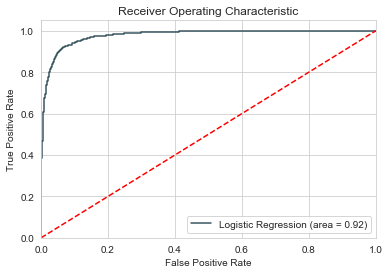

**********************************************************
Optimization terminated successfully.
         Current function value: 0.209798
         Iterations 9
Logistic_Regression_Model_2:
                             Results: Logit
Model:                 Logit               Pseudo R-squared:    0.696    
Dependent Variable:    GENDER              AIC:                 2946.0495
Date:                  2019-02-26 00:09    BIC:                 3117.0387
No. Observations:      6902                Log-Likelihood:      -1448.0  
Df Model:              24                  LL-Null:             -4761.8  
Df Residuals:          6877                LLR p-value:         0.0000   
Converged:             1.0000              Scale:               1.0000   
No. Iterations:        9.0000                                            
-------------------------------------------------------------------------
                          Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------

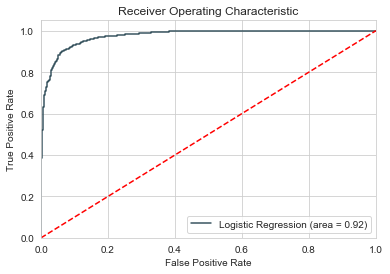

**********************************************************
Optimization terminated successfully.
         Current function value: 0.209907
         Iterations 9
Logistic_Regression_Model_3:
                             Results: Logit
Model:                 Logit               Pseudo R-squared:    0.696    
Dependent Variable:    GENDER              AIC:                 2943.5507
Date:                  2019-02-26 00:09    BIC:                 3100.8607
No. Observations:      6902                Log-Likelihood:      -1448.8  
Df Model:              22                  LL-Null:             -4761.8  
Df Residuals:          6879                LLR p-value:         0.0000   
Converged:             1.0000              Scale:               1.0000   
No. Iterations:        9.0000                                            
-------------------------------------------------------------------------
                          Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------

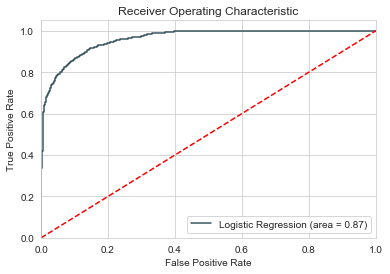

**********************************************************


In [37]:
for i in range (3):
    if i ==0:
        mod_df = df.drop(['ID','BIRTH'],axis = 1)
        cat_feats =['EDUCATION','OCCUPATION','CAR_TYPE']          
        evaluate_classification(mod_df,cat_feats,i)
    elif i ==1:
        mod_df = df.drop(['ID','BIRTH','EDUCATION','MSTATUS','TRAVTIME','PARENT1','TIF','CLM_FREQ','MVR_PTS','CLM_AMT','CAR_AGE'],axis = 1)
        cat_feats =['OCCUPATION','CAR_TYPE']          
        evaluate_classification(mod_df,cat_feats,i)
    else:
        mod_df = df.drop(['ID','BIRTH','EDUCATION','MSTATUS','TRAVTIME','PARENT1','TIF','CLM_FREQ','MVR_PTS','CLM_AMT','CAR_AGE','INCOME','CAR_USE'],axis = 1)
        cat_feats =['OCCUPATION','CAR_TYPE']          
        evaluate_classification(mod_df,cat_feats,i)        
        

## Leaderboard for Logistic Regression Models

In [38]:
leaderboard = pd.DataFrame({'Model_ID':MODEL_ID,'Accuracy':Accuracy,'CV_ERROR':LOG_CV_ERR,'AIC':AIC,'BIC':BIC})
leaderboard

Model_ID  Accuracy  CV_ERROR     AIC     BIC
0  Logistic_Regression_Model_1      0.92      0.30 2922.66 3175.72
1  Logistic_Regression_Model_2      0.92      0.31 2946.05 3117.04
2  Logistic_Regression_Model_3      0.88      0.31 2943.55 3100.86

# --------------------------------------------------------------------------------------------

## Conclusion

- Post analysing the various columns of Leaderboard, generated for Linear Regression models using OLS summary,we can conculde Model 3 to be the best Linear Model fit for predicting the Car Age from Car Insurance Claim Data with significant value of R-Squared as 84% and CV Error as low as 3.926
- For logitic regression, post generating logistic models, we can conclude Model 2 with Accuracy 92% and CV Error as 0.31, to be best model fit for predicting Gender for the above stated Dataset

# --------------------------------------------------------------------------------------------

## Contributions 

Code by self -- 90%

Code referred -- 10%

# --------------------------------------------------------------------------------------------

##  Citations

https://stackoverflow.com/questions/9031783/hide-all-warnings-in-ipython 
-- To hide the warning messages

https://github.com/mwaskom/seaborn/pull/1380 -- To resolve Matplotlib version issue.

https://stackoverflow.com/questions/10326015/singular-matrix-issue-with-numpy -- To resolve singular matrix issues

https://www.statsmodels.org/dev/examples/notebooks/generated/ols.html -- To understand OLS result summary

https://www.kaggle.com/xiaomengsun/car-insurance-claim-data/kernels -- Pulled dataset from the stated Kernel

# --------------------------------------------------------------------------------------------

##  License

Copyright 2019 Anand Kumar

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

# --------------------------------------------------------------------------------------------